In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('D:/Project/Normal-Data-Visulization/datasets/Covid-19/day_wise.csv')
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


What is the trend of new cases, new deaths, and new recoveries over time?

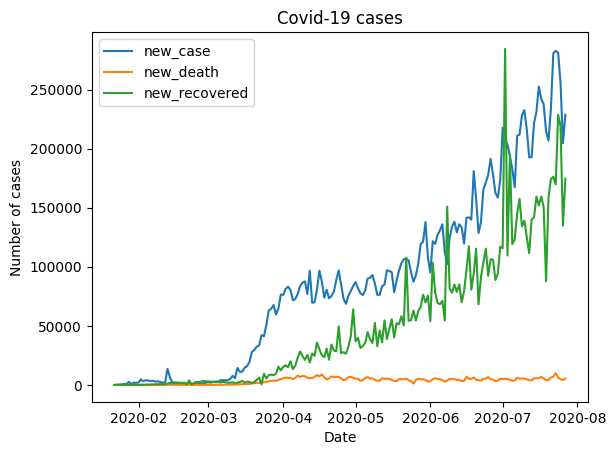

In [28]:
plt.plot(df['Date'], df['New cases'], label='new_case')
plt.plot(df['Date'], df['New deaths'], label='new_death')
plt.plot(df['Date'], df['New recovered'], label='new_recovered')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('Covid-19 cases')
plt.legend()

Calculate the rolling average for confirmed cases over a 7-day window.

In [30]:
df['Confirmed'].rolling(window=7).mean()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
183    1.475036e+07
184    1.499851e+07
185    1.524923e+07
186    1.549851e+07
187    1.575091e+07
Name: Confirmed, Length: 188, dtype: float64